# KNN

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
dataset = pd.read_csv('Car_sales.csv')


In [49]:
dataset1=dataset.replace(to_replace =["Car","Passenger"],
value =["0","1"])


In [50]:
dataset1

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,1,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,1,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,1,26.000,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26,01-04-2012,NaN
3,Acura,RL,8.588,29.725,1,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,1,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27,10-08-2011,62.777639
5,Audi,A6,18.780,23.555,1,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22,08-09-2011,84.565105
6,Audi,A8,1.380,39.000,1,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,1,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,1,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,1,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25,04-04-2011,83.998724


In [51]:
X = dataset1.iloc[:, [13, 2]].values
y = dataset1.iloc[:, 4].values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
y_pred = classifier.predict(X_test)

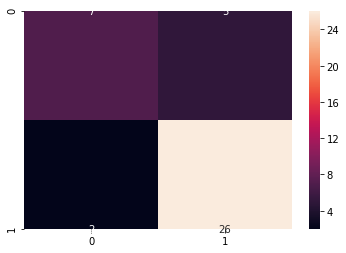

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


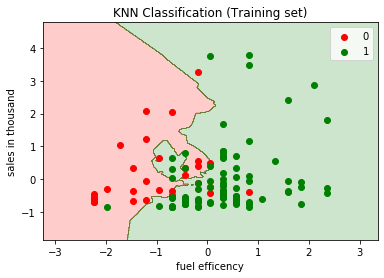

In [57]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Training set)')
plt.xlabel('fuel efficency')
plt.ylabel('sales in thousand')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


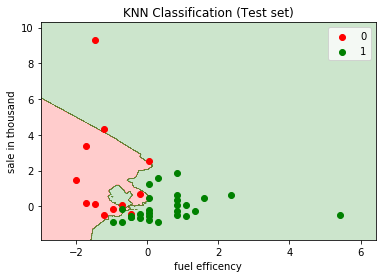

In [62]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification (Test set)')
plt.xlabel('fuel efficency')
plt.ylabel('sale in thousand')
plt.legend()
plt.show()

In [63]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("Accuracy is :",acc)

Accuracy is : 0.825


In [64]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.84      0.93      0.88        28

   micro avg       0.82      0.82      0.82        40
   macro avg       0.81      0.76      0.77        40
weighted avg       0.82      0.82      0.82        40

